In [1]:
!pip install numpy==1.24.3 cython==0.29.34
!pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505207 sha256=0f9ff08f6e887b582c2529710dd72f63354714d8dafa801e4d9e7303e2d98008
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from surprise import (
    Reader    as SurpriseReader,
    Dataset   as SurpriseDataset,
    SVD       as SVDAlgorithm,
    KNNBasic  as KNNAlgorithm,
)
from surprise.model_selection import cross_validate as cross_validate_model


In [4]:
ratings_df = pd.read_csv("ratings_small.csv")
surprise_reader = SurpriseReader(rating_scale=(1, 5))
ratings_dataset = SurpriseDataset.load_from_df(
    ratings_df[['userId', 'movieId', 'rating']],
    surprise_reader
)

In [5]:
svd_model = SVDAlgorithm()

svd_mae_cv = cross_validate_model(
    svd_model,
    ratings_dataset,
    measures=['mae'],
    cv=5
)
avg_svd_mae = svd_mae_cv['test_mae'].mean()

svd_rmse_cv = cross_validate_model(
    svd_model,
    ratings_dataset,
    measures=['rmse'],
    cv=5
)
avg_svd_rmse = svd_rmse_cv['test_rmse'].mean()

print(f"Average SVD MAE: {avg_svd_mae:.4f}")
print(f"Average SVD RMSE: {avg_svd_rmse:.4f}")


Average SVD MAE: 0.6902
Average SVD RMSE: 0.8961


In [6]:
user_cf_model = KNNAlgorithm(sim_options={'user_based': True})

user_cf_mae_cv = cross_validate_model(
    user_cf_model,
    ratings_dataset,
    measures=['mae'],
    cv=5
)
avg_user_cf_mae = user_cf_mae_cv['test_mae'].mean()

user_cf_rmse_cv = cross_validate_model(
    user_cf_model,
    ratings_dataset,
    measures=['rmse'],
    cv=5
)
avg_user_cf_rmse = user_cf_rmse_cv['test_rmse'].mean()

print(f"Average User-based CF MAE: {avg_user_cf_mae:.4f}")
print(f"Average User-based CF RMSE: {avg_user_cf_rmse:.4f}")


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Average User-based CF MAE: 0.7444
Average User-based CF RMSE: 0.9668


In [7]:
item_cf_model = KNNAlgorithm(sim_options={'user_based': False})

item_cf_mae_cv = cross_validate_model(
    item_cf_model,
    ratings_dataset,
    measures=['mae'],
    cv=5
)
avg_item_cf_mae = item_cf_mae_cv['test_mae'].mean()

item_cf_rmse_cv = cross_validate_model(
    item_cf_model,
    ratings_dataset,
    measures=['rmse'],
    cv=5
)
avg_item_cf_rmse = item_cf_rmse_cv['test_rmse'].mean()

print(f"Average Item-based CF MAE: {avg_item_cf_mae:.4f}")
print(f"Average Item-based CF RMSE: {avg_item_cf_rmse:.4f}")


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Average Item-based CF MAE: 0.7213
Average Item-based CF RMSE: 0.9343


In [8]:
similarity_measures = ['cosine', 'msd', 'pearson']

def evaluate_cf_models(measures, is_user_based):
    mae_list = []
    rmse_list = []
    for measure in measures:
        sim_options = {'name': measure, 'user_based': is_user_based}
        cf_algo = KNNAlgorithm(sim_options=sim_options)
        results = cross_validate_model(cf_algo, ratings_dataset, measures=['mae', 'rmse'], cv=5)
        avg_mae = results['test_mae'].mean()
        avg_rmse = results['test_rmse'].mean()
        print(f"Computed {measure} {'user' if is_user_based else 'item'}-based MAE: {avg_mae:.4f}")
        print(f"Computed {measure} {'user' if is_user_based else 'item'}-based RMSE: {avg_rmse:.4f}")
        mae_list.append(avg_mae)
        rmse_list.append(avg_rmse)
    return mae_list, rmse_list

print("Evaluating user-based CF:")
user_mae, user_rmse = evaluate_cf_models(similarity_measures, is_user_based=True)
print("User-based MAE scores:", user_mae)
print("User-based RMSE scores:", user_rmse)

print("Evaluating item-based CF:")
item_mae, item_rmse = evaluate_cf_models(similarity_measures, is_user_based=False)
print("Item-based MAE scores:", item_mae)
print("Item-based RMSE scores:", item_rmse)


Evaluating user-based CF:
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computed cosine user-based MAE: 0.7685
Computed cosine user-based RMSE: 0.9948
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computed msd user-based MAE: 0.7451
Computed msd user-based RMSE: 0.9694
Computing the pearson similarity matrix...
Done computing similarity matrix.


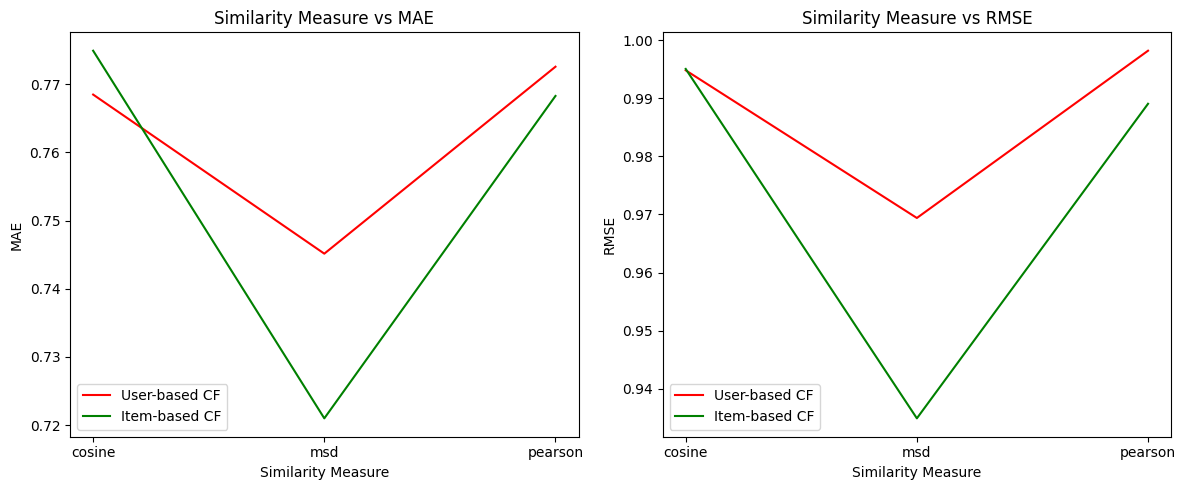

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(similarity_measures, user_mae, label='User-based CF', color="red")
plt.plot(similarity_measures, item_mae, label='Item-based CF', color="green")
plt.title('Similarity Measure vs MAE')
plt.xlabel('Similarity Measure')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(similarity_measures, user_rmse, label='User-based CF', color="red")
plt.plot(similarity_measures, item_rmse, label='Item-based CF', color="green")
plt.title('Similarity Measure vs RMSE')
plt.xlabel('Similarity Measure')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
neighbor_counts = range(10, 50, 5)

def evaluate_k_neighbors(k_values, is_user_based):
    mae_list = []
    rmse_list = []
    for k in k_values:
        print(f"Evaluating k={k} {'user-based' if is_user_based else 'item-based'} CF")
        sim_options = {'user_based': is_user_based}
        cf_model = KNNAlgorithm(k=k, sim_options=sim_options)
        avg_mae = cross_validate_model(cf_model, ratings_dataset, measures=['mae'], cv=5)['test_mae'].mean()
        avg_rmse = cross_validate_model(cf_model, ratings_dataset, measures=['rmse'], cv=5)['test_rmse'].mean()
        mae_list.append(avg_mae)
        rmse_list.append(avg_rmse)
    return mae_list, rmse_list

print("User-based CF k variation:")
user_k_mae_scores, user_k_rmse_scores = evaluate_k_neighbors(neighbor_counts, is_user_based=True)

print("Item-based CF k variation:")
item_k_mae_scores, item_k_rmse_scores = evaluate_k_neighbors(neighbor_counts, is_user_based=False)


User-based CF k variation:
Evaluating k=10 user-based CF
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating k=15 user-based CF
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix..

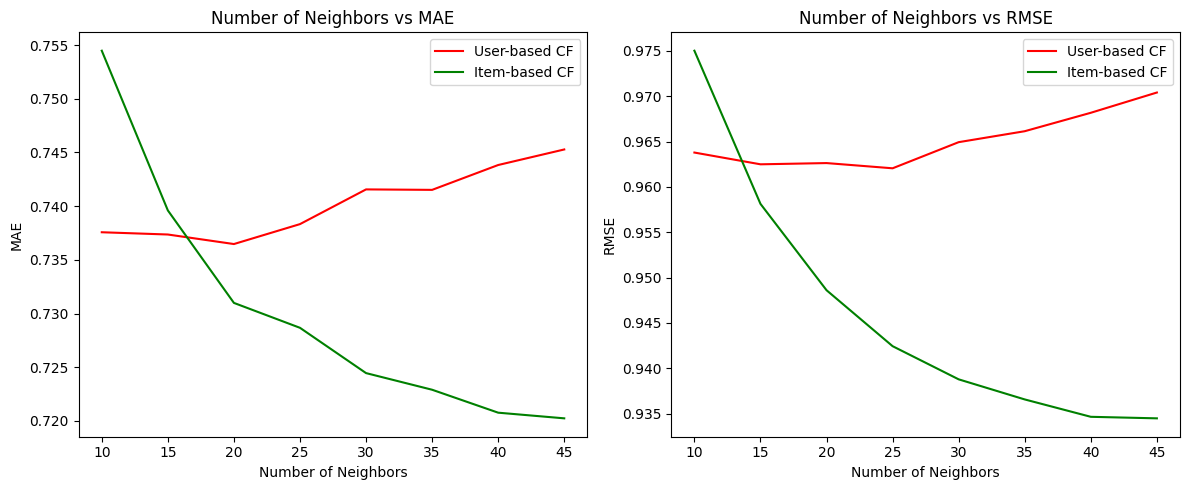

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(neighbor_counts, user_k_mae_scores, label='User-based CF', color="red")
plt.plot(neighbor_counts, item_k_mae_scores, label='Item-based CF', color="green")
plt.title('Number of Neighbors vs MAE')
plt.xlabel('Number of Neighbors')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(neighbor_counts, user_k_rmse_scores, label='User-based CF', color="red")
plt.plot(neighbor_counts, item_k_rmse_scores, label='Item-based CF', color="green")
plt.title('Number of Neighbors vs RMSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
def find_best_k_by_rmse(rmse_list, k_values):
    best_idx = rmse_list.index(min(rmse_list))
    return k_values[best_idx]

print("Determining optimal k based on RMSE")
best_user_k = find_best_k_by_rmse(user_k_rmse_scores, neighbor_counts)
best_item_k = find_best_k_by_rmse(item_k_rmse_scores, neighbor_counts)

print(f"Optimal k for user-based CF: {best_user_k}")
print(f"Optimal k for item-based CF: {best_item_k}")


Determining optimal k based on RMSE
Optimal k for user-based CF: 25
Optimal k for item-based CF: 45
